<a href="https://colab.research.google.com/github/pranjall702/DeFi-Credit-Scoring-Model-Using-Aave-V2-Data/blob/main/analysis_md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Credit scores saved to /content/user_credit_scores.json


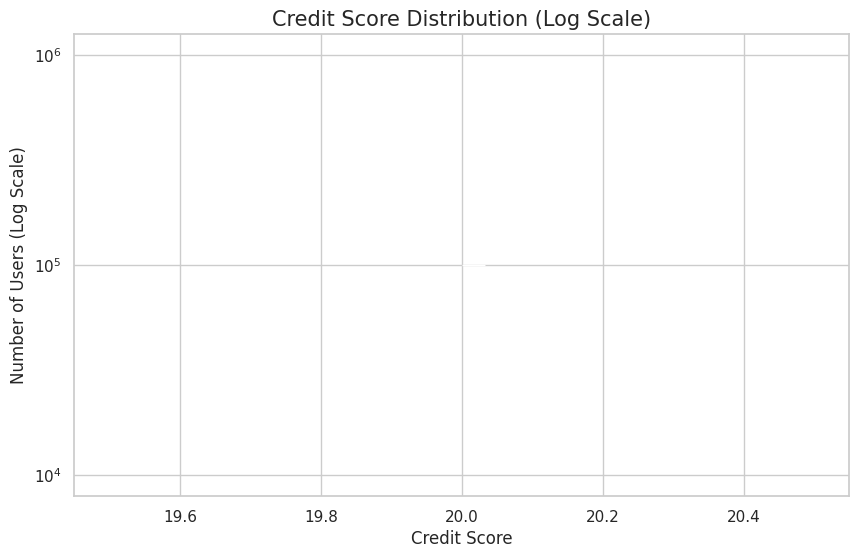

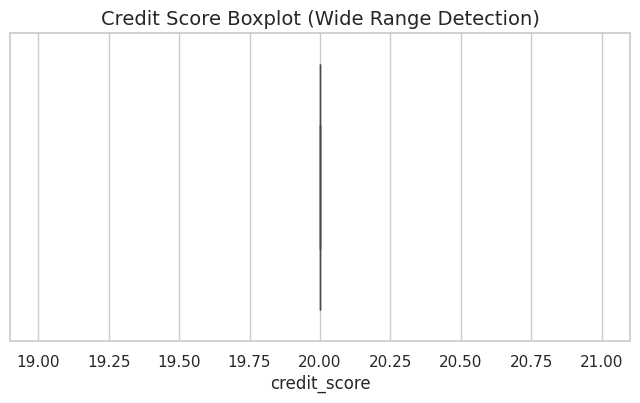

/tmp/ipython-input-5-1078442935.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='credit_score', y='userWallet', data=top_users, palette="mako")


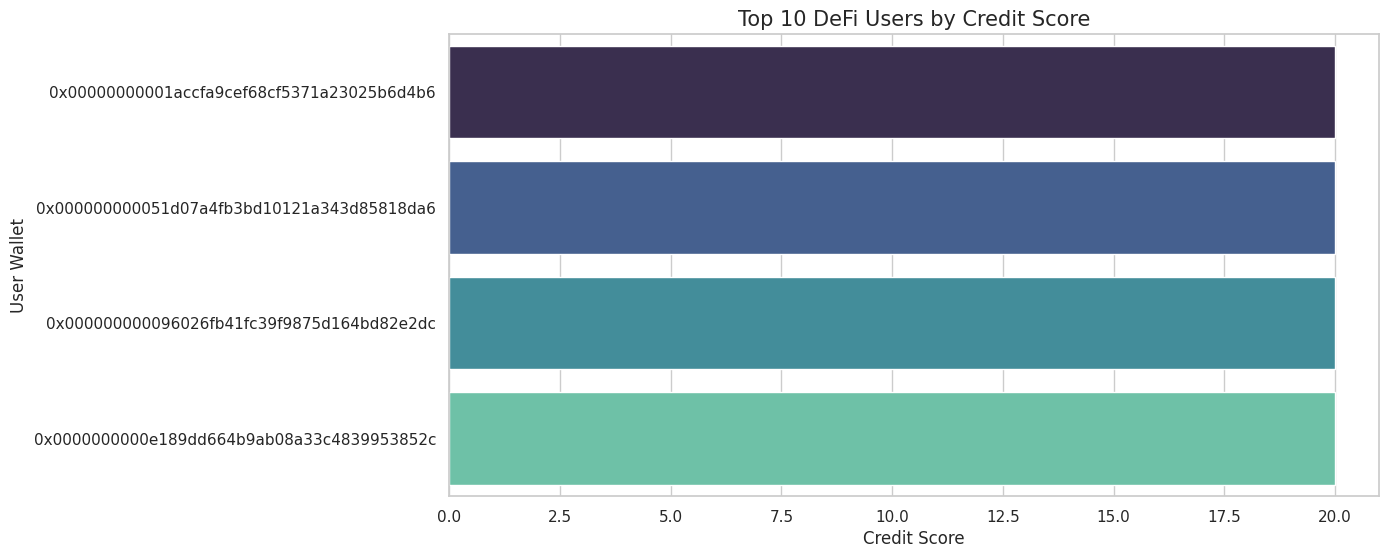

In [5]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load JSON
input_path = '/content/user-wallet-transactions.json'
df = pd.read_json(input_path)

# Credit Score Calculation
def calculate_credit_score(row):
    borrow = row.get('totalBorrowed', 0)
    repay = row.get('totalRepaid', 0)
    health = row.get('healthFactor', 1.0)
    score = (repay * 0.5) + (borrow * 0.3) + (health * 20)
    return round(score, 2)

df['credit_score'] = df.apply(calculate_credit_score, axis=1)

# Save to JSON
output = {str(row['userWallet']): {'credit_score': row['credit_score']} for _, row in df.iterrows()}

output_path = '/content/user_credit_scores.json'
with open(output_path, 'w') as f:
    json.dump(output, f, indent=4)

print(f"✅ Credit scores saved to {output_path}")

# -------------------------
# Visualization (Handles Large Values)
# -------------------------
sns.set(style="whitegrid")

# 1️⃣ Histogram (Log Scale)
plt.figure(figsize=(10,6))
sns.histplot(df['credit_score'], bins=30, kde=True, color="darkcyan", log_scale=(False, True))
plt.title("Credit Score Distribution (Log Scale)", fontsize=15)
plt.xlabel("Credit Score")
plt.ylabel("Number of Users (Log Scale)")
plt.show()

# 2️⃣ Boxplot (Shows Large Value Spread)
plt.figure(figsize=(8,4))
sns.boxplot(x=df['credit_score'], color="goldenrod")
plt.title("Credit Score Boxplot (Wide Range Detection)", fontsize=14)
plt.show()

# 3️⃣ Top 10 Users Bar Chart
top_users = df.nlargest(10, 'credit_score')[['userWallet', 'credit_score']]

plt.figure(figsize=(12,6))
sns.barplot(x='credit_score', y='userWallet', data=top_users, palette="mako")
plt.title("Top 10 DeFi Users by Credit Score", fontsize=15)
plt.xlabel("Credit Score")
plt.ylabel("User Wallet")
plt.show()
